In [4]:
import matplotlib.pyplot as plt
import fastf1
import fastf1.plotting
import matplotlib as mpl

In [5]:
drivers = ["ALB", "ALO", 
            "BOT", "DEV", 
            "GAS", "HAM", 
            "HUL", "LEC", 
            "MAG", "NOR", 
            "OCO", "PER", 
            "PIA", "RUS", 
            "SAI", "SAR", 
            "STR", "TSU", 
            "VER", "ZHO"]

driver_colors = ["alex albon", "fernando alonso",
                 "valterri bottas", "nyck de vries",
                 "pierre gasly", "lewis hamilton",
                 "nico hulkenberg", "charles leclerc",
                 "kevin magnussen", "lando norris",
                 "esteban ocon", "sergio perez",
                 "oscar piastri", "george russel",
                 "carlos sainz", "logan sargent",
                 "lance stroll", "yuki tsunoda",
                 "max verstappen", "guanyu zhou"]

compounds = {"SOFT": 'red', 
             "MEDIUM": 'yellow', 
             "HARD": 'white',
             "INTERMEDIATE": "lime",
             "WET": "blue"}

In [6]:
bahrain_race = fastf1.get_session(2023, 1, "R")
bahrain_race.load(telemetry=True, laps=True, weather=True)

saudi_race = fastf1.get_session(2023, 2, "R")
saudi_race.load(telemetry=True, laps=True, weather=True)

australia_race = fastf1.get_session(2023, 3, "R")
australia_race.load(telemetry=True, laps=True, weather=True)

azerbaijan_race = fastf1.get_session(2023, 4, "R")
azerbaijan_race.load(telemetry=True, laps=True, weather=True)

miami_race = fastf1.get_session(2023, 5, "R")
miami_race.load(telemetry=True, laps=True, weather=True)

monaco_race = fastf1.get_session(2023, 6, "R")
monaco_race.load(telemetry=True, laps=True, weather=True)

spain_race = fastf1.get_session(2023, 7, "R")
spain_race.load(telemetry=True, laps=True, weather=True)

canada_race = fastf1.get_session(2023, 8, "R")
canada_race.load(telemetry=True, laps=True, weather=True)

austria_race = fastf1.get_session(2023, 9, "R")
austria_race.load(telemetry=True, laps=True, weather=True)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/gakroppongi/Library/Caches/fastf1.
	Size: 1.92 GB


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for drive

In [7]:
bahrain_quali = fastf1.get_session(2023, 1, "Q")
bahrain_quali.load(telemetry=True, laps=True, weather=True)

saudi_quali = fastf1.get_session(2023, 2, "Q")
saudi_quali.load(telemetry=True, laps=True, weather=True)

australia_quali = fastf1.get_session(2023, 3, "Q")
australia_quali.load(telemetry=True, laps=True, weather=True)

azerbaijan_quali = fastf1.get_session(2023, 4, "Q")
azerbaijan_quali.load(telemetry=True, laps=True, weather=True)

miami_quali = fastf1.get_session(2023, 5, "Q")
miami_quali.load(telemetry=True, laps=True, weather=True)

monaco_quali = fastf1.get_session(2023, 6, "Q")
monaco_quali.load(telemetry=True, laps=True, weather=True)

spain_quali = fastf1.get_session(2023, 7, "Q")
spain_quali.load(telemetry=True, laps=True, weather=True)

canada_quali = fastf1.get_session(2023, 8, "Q")
canada_quali.load(telemetry=True, laps=True, weather=True)

austria_quali = fastf1.get_session(2023, 9, "Q")
austria_quali.load(telemetry=True, laps=True, weather=True)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached 

In [16]:
color = {"LEC": fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}["LEC"]
color

'#012564'

In [28]:
def laptime_plot(session, session_name, drivers, driver_colors):
    fig, ax = plt.subplots()
        
    ax.set_xlabel('Lap')
    ax.set_ylabel("Lap Time")
    ax.grid()

    for i in range(len(drivers)):
        laptime = session.laps.pick_driver(drivers[i]).LapTime.dt.total_seconds()
        lapnumber = session.laps.pick_driver(drivers[i]).LapNumber
        color = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}[drivers[i]]
        ax.plot(lapnumber, laptime, color=color, label=drivers[i])

                

    plt.legend(bbox_to_anchor=(1.0, 1.02))

    ax.set_facecolor("black")
    fig.set_facecolor("black")

    mpl.rc('text', color='white')
    mpl.rc('axes', labelcolor='white')
    mpl.rc('xtick', color='white')
    mpl.rc('ytick', color='white')

    plt.suptitle(f"Lap time comparison \n "f"{session.event['EventName']} {session.event.year} {session_name}")
    plt.tight_layout()
    plt.figure().set_size_inches(50000, 500000, forward=True)
    fig.set_dpi(1000)
    plt.show()

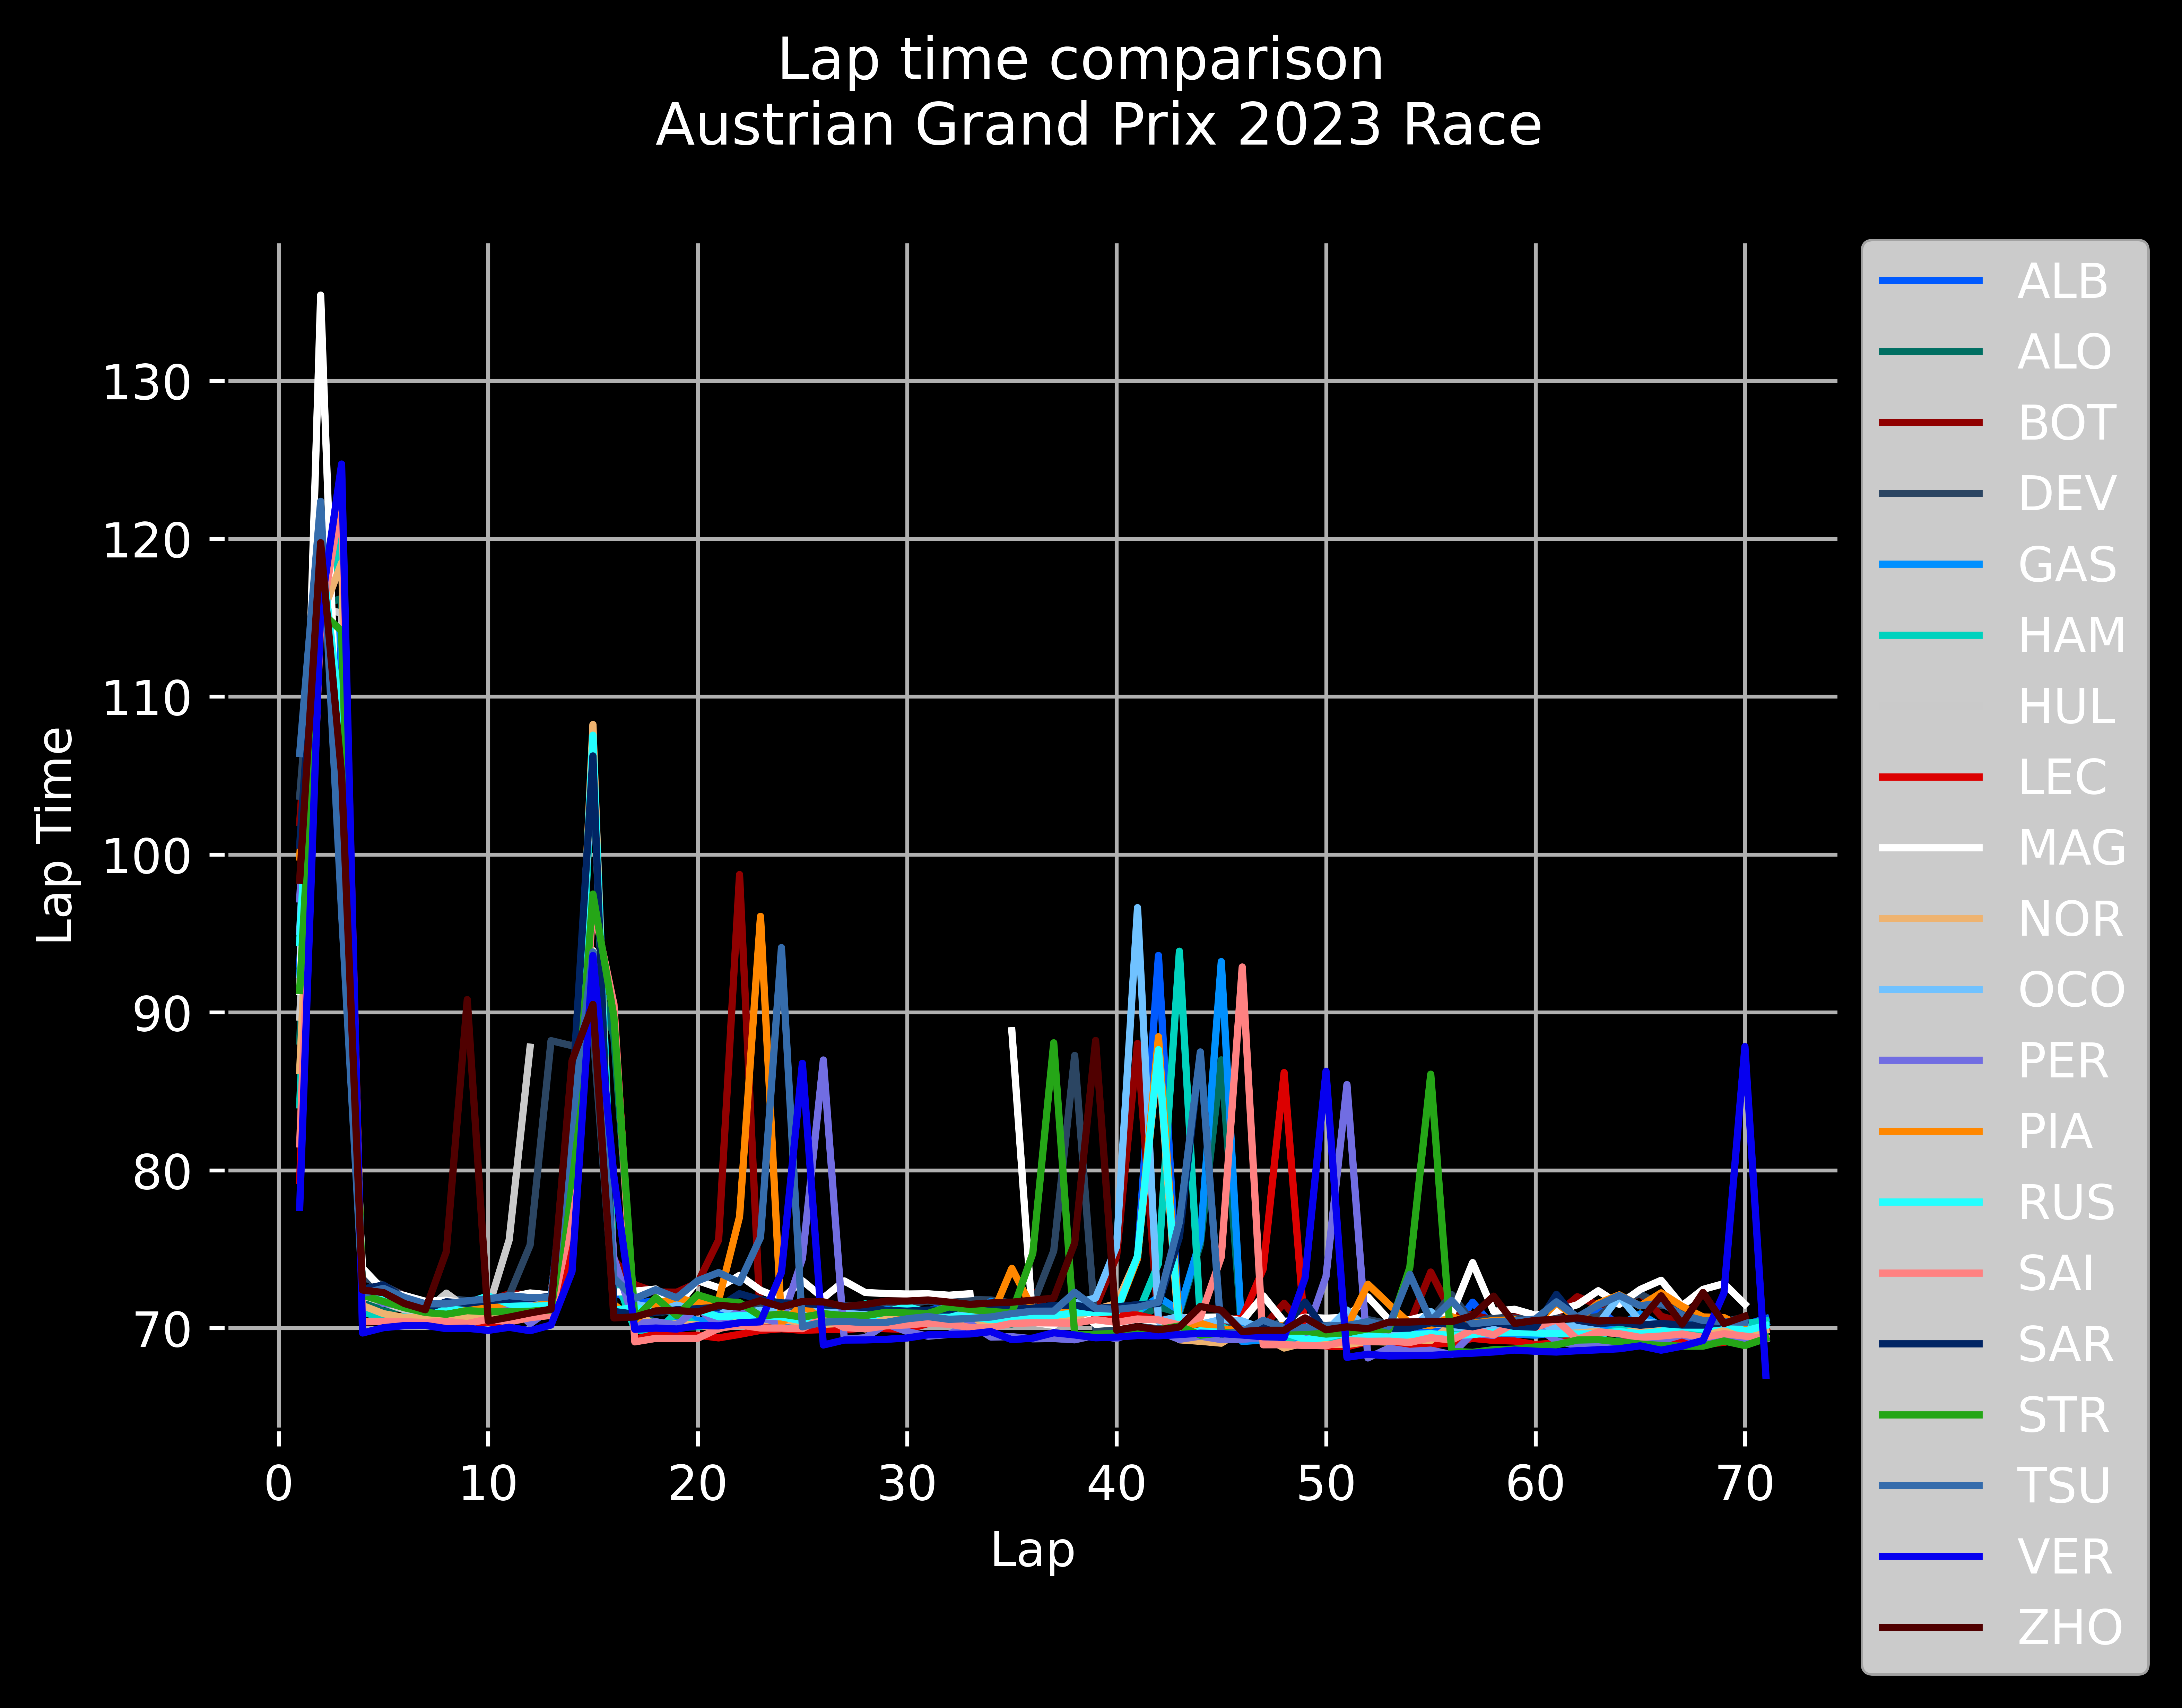

<Figure size 5e+06x5e+07 with 0 Axes>

In [29]:
session = austria_race
session_name = "Race"

laptime_plot(session, session_name, drivers, driver_colors)